### Preparing Data and Modeling

### Logistic Regression

We have no numerical features. We will need to transform all of them in order to make them readable by ML models.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
%store -r X_train
%store -r y_train
%store -r X_test
%store -r y_test

In [2]:
logreg = LogisticRegression()
le = LabelEncoder()
ohe = OneHotEncoder()

In [3]:
X_train = X_train.drop(columns=['CouncilDistrict', 'Latitude', 'Longitude', 'ViolationDescription', 'Action',
                                 'InspectionDate','Zipcode', 'Camis', 'Dba', 'InspectionYear', 'IsChain',
                                 'ViolationCode', 'Cuisine', 'Boro'])

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117697 entries, 126620 to 248657
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Grade           117697 non-null  object
 1   InspectionType  117697 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [5]:
X_test = X_test.drop(columns=['CouncilDistrict', 'Latitude', 'Longitude', 'ViolationDescription', 'Action',
                                 'InspectionDate','Zipcode', 'Camis', 'Dba', 'InspectionYear', 'IsChain',
                                  'ViolationCode', 'Cuisine', 'Boro'])

In [6]:
y_train_le = le.fit_transform(y_train)
print(y_train_le)

[1 1 0 ... 0 0 1]


In [7]:
y_test_le = le.fit_transform(y_test)

In [8]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_train_ohe = ohe.fit_transform(X_train)
X_train_ohe.head()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Grade_A,Grade_N,Grade_B,Grade_P,Grade_C,InspectionType_Cycle Inspection / Initial Inspection,InspectionType_Cycle Inspection / Re-inspection,InspectionType_Pre-permit (Operational) / Initial Inspection,InspectionType_Pre-permit (Operational) / Re-inspection,InspectionType_Pre-permit (Operational) / Reopening Inspection,InspectionType_Cycle Inspection / Reopening Inspection,InspectionType_Pre-permit (Non-operational)
126620,1,0,0,0,0,1,0,0,0,0,0,0
14307,1,0,0,0,0,0,1,0,0,0,0,0
286220,1,0,0,0,0,0,1,0,0,0,0,0
374436,1,0,0,0,0,0,1,0,0,0,0,0
47465,1,0,0,0,0,1,0,0,0,0,0,0


In [9]:
X_test_ohe = ohe.fit_transform(X_test)
X_test_ohe.head()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Grade_A,Grade_P,Grade_B,Grade_N,Grade_C,InspectionType_Cycle Inspection / Initial Inspection,InspectionType_Cycle Inspection / Re-inspection,InspectionType_Pre-permit (Operational) / Reopening Inspection,InspectionType_Pre-permit (Operational) / Initial Inspection,InspectionType_Cycle Inspection / Reopening Inspection,InspectionType_Pre-permit (Operational) / Re-inspection,InspectionType_Pre-permit (Non-operational)
234299,1,0,0,0,0,1,0,0,0,0,0,0
309886,1,0,0,0,0,1,0,0,0,0,0,0
256582,1,0,0,0,0,0,1,0,0,0,0,0
66275,0,1,0,0,0,0,0,1,0,0,0,0
121712,1,0,0,0,0,1,0,0,0,0,0,0


In [10]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train_ohe, y_train_le)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

### Predict

In [11]:
# Generate predictions
y_hat_train = logreg.predict(X_train_ohe)
y_hat_test = logreg.predict(X_test_ohe)

### Comparing Train and Test results

* ### Train Data

In [12]:
residuals = np.abs(y_train_le - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0    65858
1    51839
dtype: int64
------------------------------------
0    0.559555
1    0.440445
dtype: float64


* ### Test Data

In [13]:
residuals = np.abs(y_test_le - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0    42755
1    35710
dtype: int64
------------------------------------
0    0.544893
1    0.455107
dtype: float64


### Confusion Matrix

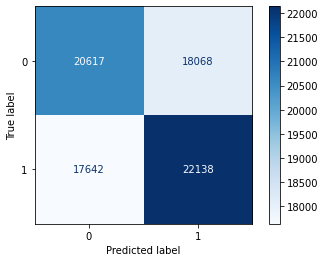

In [14]:
plot_confusion_matrix(logreg, X_test_ohe, y_test_le,
                     cmap=plt.cm.Blues)
plt.show()

* 'TP': 22138, 'TN': 20617, 'FP': 18068, 'FN': 17642}

### Evaluation Metrics
Out of all the predictions our model made, what percentage were correct

In [15]:
print('Training Precision: ', precision_score(y_train_le, y_hat_train))
print('Testing Precision: ', precision_score(y_test_le, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train_le, y_hat_train))
print('Testing Recall: ', recall_score(y_test_le, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train_le, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test_le, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train_le, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test_le, y_hat_test))

Training Precision:  0.5684190743050453
Testing Precision:  0.5567749100909668



Training Recall:  0.5587578307384827
Testing Recall:  0.5292860734037205



Training Accuracy:  0.5621638614408184
Testing Accuracy:  0.5477474033008347



Training F1-Score:  0.5635470483611417
Testing F1-Score:  0.5426826125057992


### Plotting ROC and AUC

Train AUC: 0.584561104366925
Test AUC: 0.5604662690812132


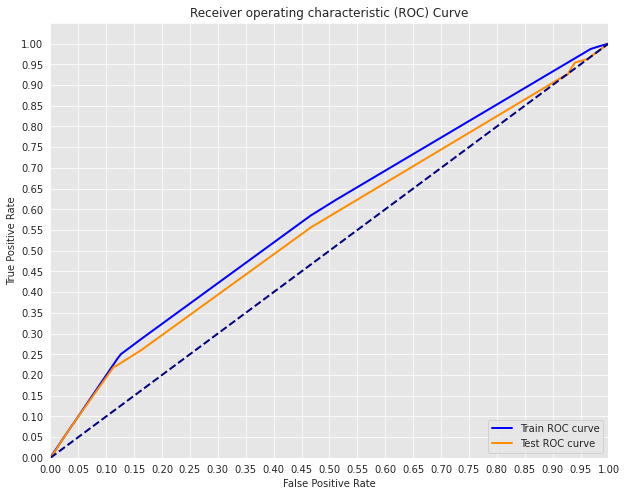

In [37]:
y_train_score = logreg.decision_function(X_train_ohe)
y_test_score = logreg.decision_function(X_test_ohe)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train_le, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_le, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Would our model improve if we add an intercept?

In [40]:
# Create new model with intercept
logreg_interc = LogisticRegression(fit_intercept=True, C=1e16, solver='liblinear')
logreg_interc.fit(X_train_ohe, y_train_le)

LogisticRegression(C=1e+16, solver='liblinear')

Custom Model Test AUC: 0.5447281977982432
Custome Model Train AUC: 0.5592561815186773
Scikit-learn Model 1 Test AUC: 0.5604662690812132
Scikit-learn Model 1 Train AUC: 0.584561104366925
Scikit-learn Model 2 with intercept Test AUC: 0.5604662690812132
Scikit-learn Model 2 with intercept Train AUC: 0.584561104366925


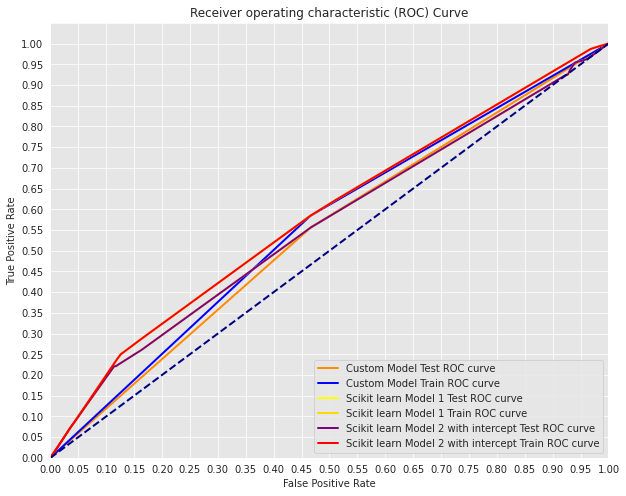

In [42]:
# Initial model plots
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_le, y_hat_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_le, y_hat_train)


print('Custom Model Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Custome Model Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Custom Model Test ROC curve')
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Custom Model Train ROC curve')


# Second model plots
y_test_score = logreg.decision_function(X_test_ohe)
y_train_score = logreg.decision_function(X_train_ohe)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test_le, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_le, y_train_score)

print('Scikit-learn Model 1 Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 1 Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='yellow',
         lw=lw, label='Scikit learn Model 1 Test ROC curve')
plt.plot(train_fpr, train_tpr, color='gold',
         lw=lw, label='Scikit learn Model 1 Train ROC curve')


# Third model plots
y_test_score = logreg_interc.decision_function(X_test_ohe)
y_train_score = logreg_interc.decision_function(X_train_ohe)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test_le, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_le, y_train_score)

print('Scikit-learn Model 2 with intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 2 with intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='purple',
         lw=lw, label='Scikit learn Model 2 with intercept Test ROC curve')
plt.plot(train_fpr, train_tpr, color='red',
         lw=lw, label='Scikit learn Model 2 with intercept Train ROC curve')

# Formatting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Conclusions

* Adding an intercept did not improve our model. 
* In real life, it is very unlikely for an eatery to have no violations at all during service. It is virtually impossible. 
* The important thing is to differentiate which of these violations could cause eaters to get sick. 
* For our problem, we want to keep False Negatives as low as possible, since we never want to predict a True Critical Flag as Non-Critical.
* With our Test Data, our model predicted about 22% of violations as False Negatives. 
* Ideally, we want 'recall' high and 'precision' low in the sense that it will be better to predict a CriticalFlag as positive when it's negative.
* Based on the Inspection Type and Grade an establishment gets, we can predict the likelihood of Critical violations.

### Future Work 
* Tuning the model to reduce the number of False Negatives as much as possible.